# Desplegado de proteínas por temperatura

Importamos algunas bibliotecas necesarias (o no)

In [1]:
%matplotlib inline

In [2]:
import os, sys
from matplotlib import pyplot as pl
import numpy as np
import csv
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
pl.rcParams.update({'font.size': 14})

Definimos las funciones que queremos calcular:
+ ∆G(T)
+ ∆H(T)
+ ∆S(T)
+ Keq(T)
+ fracción plegada

In [4]:
def deltaGdeT(T,Tm,deltaHm,deltaCp):
    deltaG=(Tm-T)/Tm*deltaHm+deltaCp*(T-Tm-T*np.log(T/Tm))
    return deltaG

In [5]:
def deltaHdeT(T,Tm,deltaHm,deltaCp):
    deltaH=deltaHm+deltaCp*(T-Tm)
    return deltaH

In [6]:
def deltaSdeT(T,Tm,deltaHm,deltaCp):
    deltaG=(Tm-T)/Tm*deltaHm+deltaCp*(T-Tm-T*np.log(T/Tm))
    deltaH=deltaHm+deltaCp*(T-Tm)
    return -(deltaG-deltaH)

In [7]:
def KdeT(T,Tm,deltaHm,deltaCp):
    R=1.99 #cal/mol.K
    return np.exp(-deltaGdeT(T,Tm,deltaHm,deltaCp)/R/T)

In [8]:
def fHdeT(T,Tm,deltaHm,deltaCp):
    R=1.99 #cal/mol.K
    fH=1/(np.exp(-(deltaGdeT(T,Tm,deltaHm,deltaCp))/(R*T))+1)
    #return coso*R*T
    return fH

Ponemos parámetros "razonables" para una proteína genérica
+ Tm
+ ∆H(Tm)
+ ∆Cp

In [9]:
Tm=333 #K
deltaHm= 100000 #cal/mol
deltaCp=3000 #cal/mol.K

Graficamos en un rango de temperatura

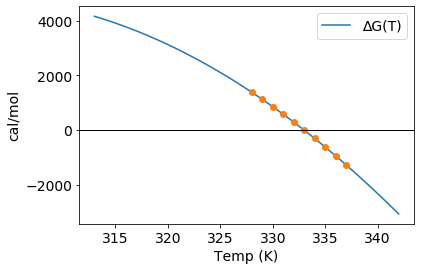

In [10]:
T=np.arange(313,343)
DG=deltaGdeT(T,Tm,deltaHm,deltaCp)
DH=deltaHdeT(T,Tm,deltaHm,deltaCp)
DS=deltaSdeT(T,Tm,deltaHm,deltaCp)
Keq=KdeT(T,Tm,deltaHm,deltaCp)
medibles=(Keq<10) & (Keq>0.1)
pl.plot(T,DG, label="∆G(T)")
# pl.plot(T,DH, label="∆H(T)")
# pl.plot(T,DS, label="∆S(T)")
pl.plot(T[medibles],DG[medibles],"o")
pl.ylabel("cal/mol")
pl.xlabel("Temp (K)")
pl.legend(loc=0)
# pl.ylim([-3500,12000])
pl.axhline(linewidth=1,color="k")
pl.savefig("deltasGyMedibles.pdf")

Extendemos el rango de temperatura

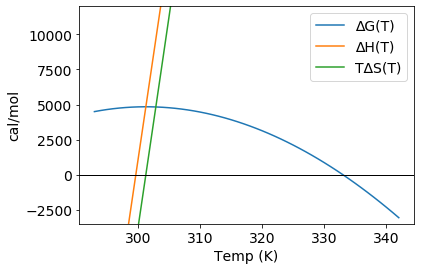

In [11]:
T=np.arange(293,343)
DG=deltaGdeT(T,Tm,deltaHm,deltaCp)
DH=deltaHdeT(T,Tm,deltaHm,deltaCp)
DS=deltaSdeT(T,Tm,deltaHm,deltaCp)
# Keq=KdeT(T,Tm,deltaHm,deltaCp)
# medibles=(Keq<10) & (Keq>0.1)
pl.plot(T,DG, label="∆G(T)")
pl.plot(T,DH, label="∆H(T)")
pl.plot(T,DS, label="T∆S(T)")
# pl.plot(T[medibles],DG[medibles],"o")
pl.ylabel("cal/mol")
pl.xlabel("Temp (K)")
pl.legend(loc=0)
pl.ylim([-3500,12000])
pl.axhline(linewidth=1,color="k")
pl.savefig("deltasJuntos.pdf")

Hacemos zoom sobre el máximo de la curva de ∆G(T)

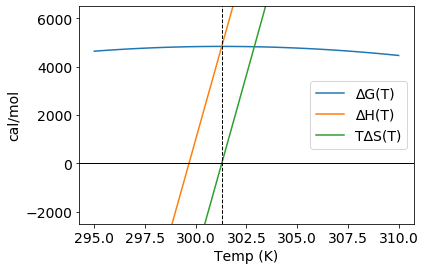

In [12]:
T=np.linspace(295,310)
DG=deltaGdeT(T,Tm,deltaHm,deltaCp)
DH=deltaHdeT(T,Tm,deltaHm,deltaCp)
DS=deltaSdeT(T,Tm,deltaHm,deltaCp)
pl.plot(T,DG, label="∆G(T)")
pl.plot(T,DH, label="∆H(T)")
pl.plot(T,DS, label="T∆S(T)")
pl.ylabel("cal/mol")
pl.xlabel("Temp (K)")
pl.legend(loc=0)
pl.ylim([-2500,6500])
pl.axhline(linewidth=1,color="k")
#T∆S≈0
TDS0=(-T[(DS>-500) & (DS <0 )]+T[(DS>0) & (DS <500 )])/2+T[(DS>-500) & (DS <0 )]
pl.axvline(TDS0,linewidth=1,color="k",linestyle="--")
pl.savefig("deltasJuntosMax.pdf")

Graficamos las fracciones de proteína plegada y desplegada

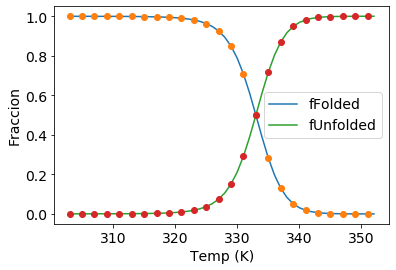

In [13]:
T=np.arange(303,353)
tota=fHdeT(T,Tm,deltaHm,deltaCp)
pl.plot(T,tota, label="fFolded")
pl.plot(T[::2],tota[::2],"o")
pl.plot(T,1-tota, label="fUnfolded")
pl.plot(T[::2],1-tota[::2],"o")
pl.ylabel("Fraccion")
pl.xlabel("Temp (K)")
pl.legend(loc=0)
#pl.ylim([-3500,4500])
pl.savefig("Equil.pdf")

Ahora gráficos asociados de ∆G(T) y fracción plegada y desplegada

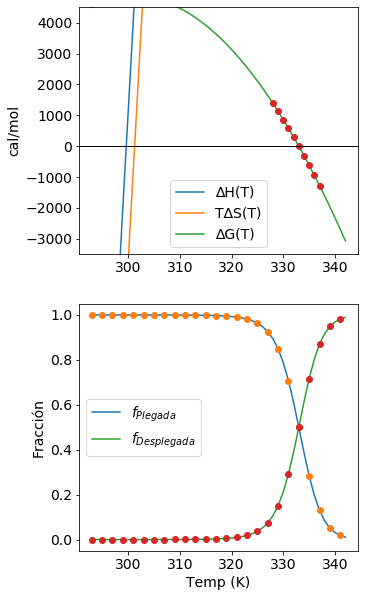

In [14]:
T=np.arange(293,343)

DG=deltaGdeT(T,Tm,deltaHm,deltaCp)
DH=deltaHdeT(T,Tm,deltaHm,deltaCp)
DS=deltaSdeT(T,Tm,deltaHm,deltaCp)
Keq=KdeT(T,Tm,deltaHm,deltaCp)
medibles=(Keq<10) & (Keq>0.1)

tota=fHdeT(T,Tm,deltaHm,deltaCp)

fig, axes=pl.subplots(2,1)

# axes[0].plot(T,DH, label="∆H(T)")
# axes[0].plot(T,DS, label="∆S(T)")
# axes[0].plot(T,DG, label="∆G(T)")
# axes[0].set_ylabel("cal/mol")
# axes[0].legend(loc=0)
# axes[0].axhline(linewidth=1,color="k")


axes[0].plot(T,DH, label="∆H(T)")
axes[0].plot(T,DS, label="T∆S(T)")
axes[0].plot(T,DG, label="∆G(T)")
axes[0].plot(T[medibles],DG[medibles],"o")
axes[0].set_ylabel("cal/mol")
axes[0].legend(loc=0)
axes[0].set_ylim([-3500,4500])
axes[0].axhline(linewidth=1,color="k")

axes[1].plot(T,tota, label=(r"$f_{Plegada}$"))
axes[1].plot(T[::2],tota[::2],"o")
axes[1].plot(T,1-tota, label=(r"$f_{Desplegada}$"))
axes[1].plot(T[::2],1-tota[::2],"o")
axes[1].set_ylabel("Fracción")
axes[1].set_xlabel("Temp (K)")
axes[1].legend(loc=0)

fig.set_figheight(10)
fig.set_figwidth(5)
pl.savefig("tresjuntos.pdf",bbox_inches='tight')

Extendemos a temperaturas más bajas para ver que pasa cuando la curva de ∆G(T) sigue bajando

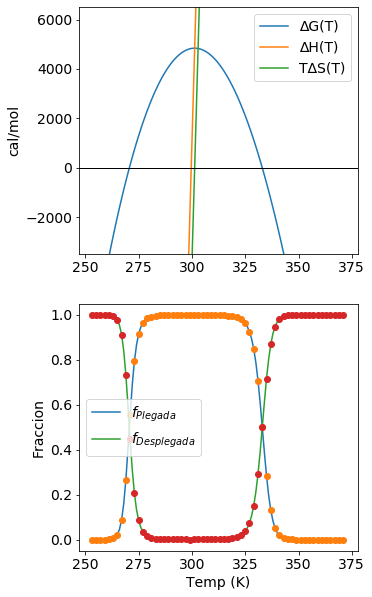

In [15]:
T=np.arange(253,373)

DG=deltaGdeT(T,Tm,deltaHm,deltaCp)
DH=deltaHdeT(T,Tm,deltaHm,deltaCp)
DS=deltaSdeT(T,Tm,deltaHm,deltaCp)

tota=fHdeT(T,Tm,deltaHm,deltaCp)

fig, axes=pl.subplots(2,1)

# axes[0].plot(T,DG, label="∆G(T)")
# axes[0].plot(T,DH, label="∆H(T)")
# axes[0].plot(T,DS, label="∆S(T)")
# axes[0].set_ylabel("cal/mol")
# axes[0].legend(loc=0)
# axes[0].axhline(linewidth=1,color="k")

axes[0].plot(T,DG, label="∆G(T)")
axes[0].plot(T,DH, label="∆H(T)")
axes[0].plot(T,DS, label="T∆S(T)")
axes[0].set_ylabel("cal/mol")
axes[0].legend(loc=0)
axes[0].set_ylim([-3500,6500])
axes[0].axhline(linewidth=1,color="k")


axes[1].plot(T,tota, label=(r"$f_{Plegada}$"))
axes[1].plot(T[::2],tota[::2],"o")
axes[1].plot(T,1-tota, label=(r"$f_{Desplegada}$"))
axes[1].plot(T[::2],1-tota[::2],"o")
axes[1].set_ylabel("Fraccion")
axes[1].set_xlabel("Temp (K)")
axes[1].legend(loc=0)

fig.set_figheight(10)
fig.set_figwidth(5)
pl.savefig("tresjuntosb.pdf",bbox_inches='tight')

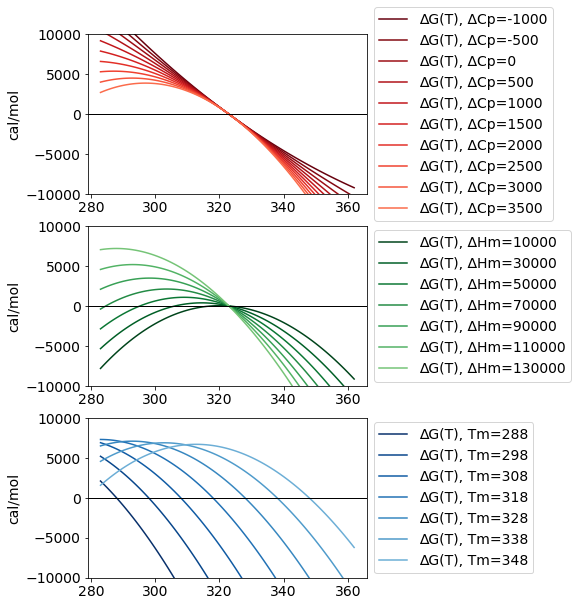

In [51]:
T=np.arange(263,363)
T=np.arange(283,363)

Tm=323 #K
deltaHm= 95000 #cal/mol
deltaCp=3600 #cal/mol.K

DG=deltaGdeT(T,Tm,deltaHm,deltaCp)
DH=deltaHdeT(T,Tm,deltaHm,deltaCp)
DS=deltaSdeT(T,Tm,deltaHm,deltaCp)
tota=fHdeT(T,Tm,deltaHm,deltaCp)


fig, axes=pl.subplots(3,1)
limiteY=[-10000,10000]
listaDeltaCp=list(range(-1000,4000,500))
color_idx = np.linspace(0, 0.5, len(listaDeltaCp))
for i,deltaCp in enumerate(listaDeltaCp):
    DG=deltaGdeT(T,Tm,deltaHm,deltaCp)
    axes[0].plot(T,DG, color=pl.cm.Reds_r(color_idx[i]),label="∆G(T), ∆Cp=%i"%deltaCp)
    axes[0].set_ylabel("cal/mol")
    axes[0].set_ylim(limiteY)
    axes[0].legend(loc=0)
    axes[0].axhline(linewidth=1,color="k")
    axes[0].legend(loc='center left',bbox_to_anchor=(1, 0.5))

listaDeltaH=list(range(10000,150000,20000))
color_idx = np.linspace(0, 0.5, len(listaDeltaH))
for i,deltaHm in enumerate(listaDeltaH):
    DG=deltaGdeT(T,Tm,deltaHm,deltaCp)
    axes[1].plot(T,DG, color=pl.cm.Greens_r(color_idx[i]),label="∆G(T), ∆Hm=%i"%deltaHm)
    axes[1].set_ylabel("cal/mol")
    axes[1].set_ylim(limiteY)
    axes[1].legend(loc=0)
    axes[1].axhline(linewidth=1,color="k")
    axes[1].legend(loc='center left',bbox_to_anchor=(1, 0.5))

listaTm=list(range(288,358,10))
color_idx = np.linspace(0, 0.5, len(listaTm))
for i,Tm in enumerate(listaTm):
    DG=deltaGdeT(T,Tm,deltaHm,deltaCp)
    axes[2].plot(T,DG, color=pl.cm.Blues_r(color_idx[i]),label="∆G(T), Tm=%i"%Tm)
    axes[2].set_ylabel("cal/mol")
    axes[2].set_ylim(limiteY)
    axes[2].legend(loc=0)
    axes[2].axhline(linewidth=1,color="k")
    axes[2].legend(loc='center left',bbox_to_anchor=(1, 0.5))


fig.set_figheight(10)
fig.set_figwidth(5)
pl.savefig("tresjuntosb.pdf",bbox_inches='tight')

In [49]:
listaDeltaH

[10000, 30000, 50000, 70000, 90000, 110000, 130000]